In [2]:
import matplotlib.pyplot as plt
import spikeinterface
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np

In [2]:
block_index = [1,2]
recording_list = []

for k in range(len(block_index)):
    recording = se.BlackrockRecordingExtractor(r'datafile00'+str(block_index[k])+'.ns6',stream_id='6',block_index=k)
    recording = recording.channel_slice([str(i+1) for i in range(32)])
    recording_list.append(recording)

    print(recording.get_num_samples())

54600301
54600301
[1460 1451 1437 1412 1425 1404 1376 1382 1448 1472 1476 1510 1535 1524
 1563 1595 1609 1609 1601 1660 1671 1680 1665 1690 1668 1632 1631 1617
 1637 1679 1703 1714 1738 1770 1711 1674 1679 1645 1599 1590 1580 1550
 1569 1668 1678 1660 1682 1653 1645 1656 1636 1638 1631 1606 1556 1567
 1604 1624 1628 1656 1688 1681 1639 1618 1673 1667 1626 1625 1635 1651
 1669 1660 1728 1733 1713 1716 1698 1719 1731 1730 1740 1726 1690 1696
 1741 1745 1742 1758 1767 1768 1735 1747 1738 1767 1773 1740 1720 1758
 1764 1756]


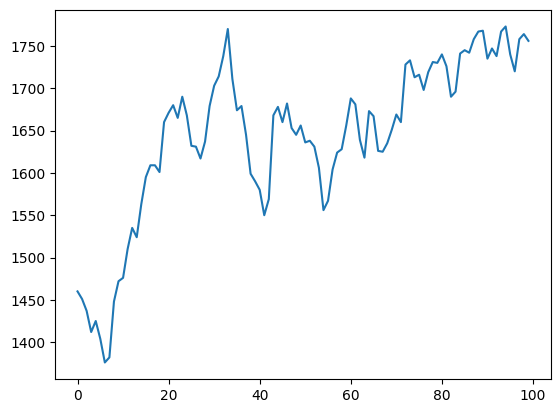

In [3]:
# Data lengths here/in BlackRock/After Kilosort are different. It is possibly caused by zero-padding.
temp = recording_list[0].frame_slice(0,100)
temp = temp.get_traces()
temp = temp[:,0]
print(temp)
plt.plot(temp)
plt.show()

In [4]:
rec = si.concatenate_recordings(recording_list)
print(rec)
s = rec.get_num_samples(segment_index=0)
print(f'segment {0} num_samples {s}')

ConcatenateSegmentRecording: 32 channels - 1 segments - 30.0kHz - 3640.020s
segment 0 num_samples 109200602


(32, 2)


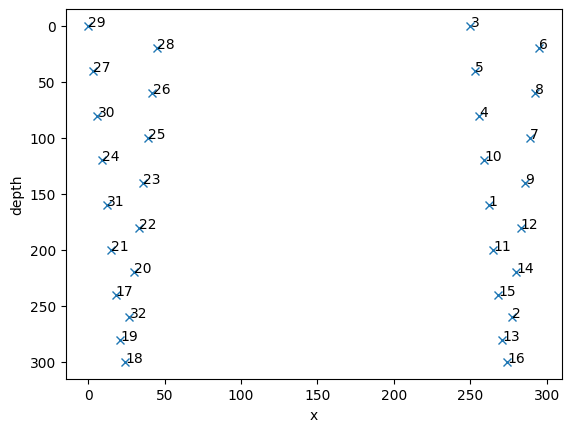

In [5]:
# compute location of each recording site
dx = 3
dy = 20
P = 250

x = np.zeros((32,))
y = np.zeros((32,))
x0 = 0
y0 = 0
for k in range(32):
    x[k] = x0
    y[k] = y0

    if k == 15:
        x0 = x[0] + P
        y0 = y[0]
    else:
        x0 += dx 
        if k<7 or (k>=16 and k<23):
            y0 += dy*2
        elif k==7 or k==23:
            y0 += dy
        elif (k>7 and k<=15) or (k>23 and k<=31):
            y0 -=dy*2

location = np.transpose(np.array([x,y]))
print(location.shape)

idx_raw = [29,27,30,24,31,21,17,19,18,32,20,22,23,25,26,28,3,5,4,10,1,11,15,13,16,2,14,12,9,7,8,6]
idx = np.argsort(idx_raw)
location = location[idx,:]

plt.plot(location[:,0],location[:,1],'x')
for i in range(len(idx)):
    plt.annotate(str(i+1), xy = (location[i,0], location[i,1]), xytext = (location[i,0]+0.1, location[i,1]+0.1))
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('depth')
plt.show()

In [9]:
rec.set_channel_locations(location)

In [6]:
sorted_params = ss.Kilosort2_5Sorter.default_params()
# sorted_params['nblocks'] = 0

In [7]:
ss.Kilosort3Sorter.set_kilosort3_path(r'C:/Users/jiumao/Desktop/KiloSort')
ss.Kilosort2_5Sorter.set_kilosort2_5_path(r'C:/Users/jiumao/Desktop/Kilosort_2_5')

Setting KILOSORT3_PATH environment variable for subprocess calls to: C:\Users\jiumao\Desktop\KiloSort
Setting KILOSORT2_5_PATH environment variable for subprocess calls to: C:\Users\jiumao\Desktop\Kilosort_2_5


In [ ]:
output = ss.run_kilosort2_5(rec,**sorted_params)
# output = ss.run_kilosort3(rec,**sorted_params)